In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [16]:
iris_df = sns.load_dataset('iris')
X, y = iris_df[iris_df.columns[:-1]].values, iris_df[iris_df.columns[-1]].values

In [17]:
print(X.shape, y.shape)
print(X[0], y[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] setosa


In [18]:
y = np.where(y == 'setosa', 0, np.where(y == 'versicolor', 1, 2))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1337
)

In [24]:
def make_df(X, y):
    df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1), columns=iris_df.columns)
    df[['species']] = np.where(df[['species']] == 0, 'setosa', np.where(df[['species']] == 1, 'versicolor', 'virginica'))
    return df

/Users/sourabh/.pyenv/versions/3.10.5/envs/ai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


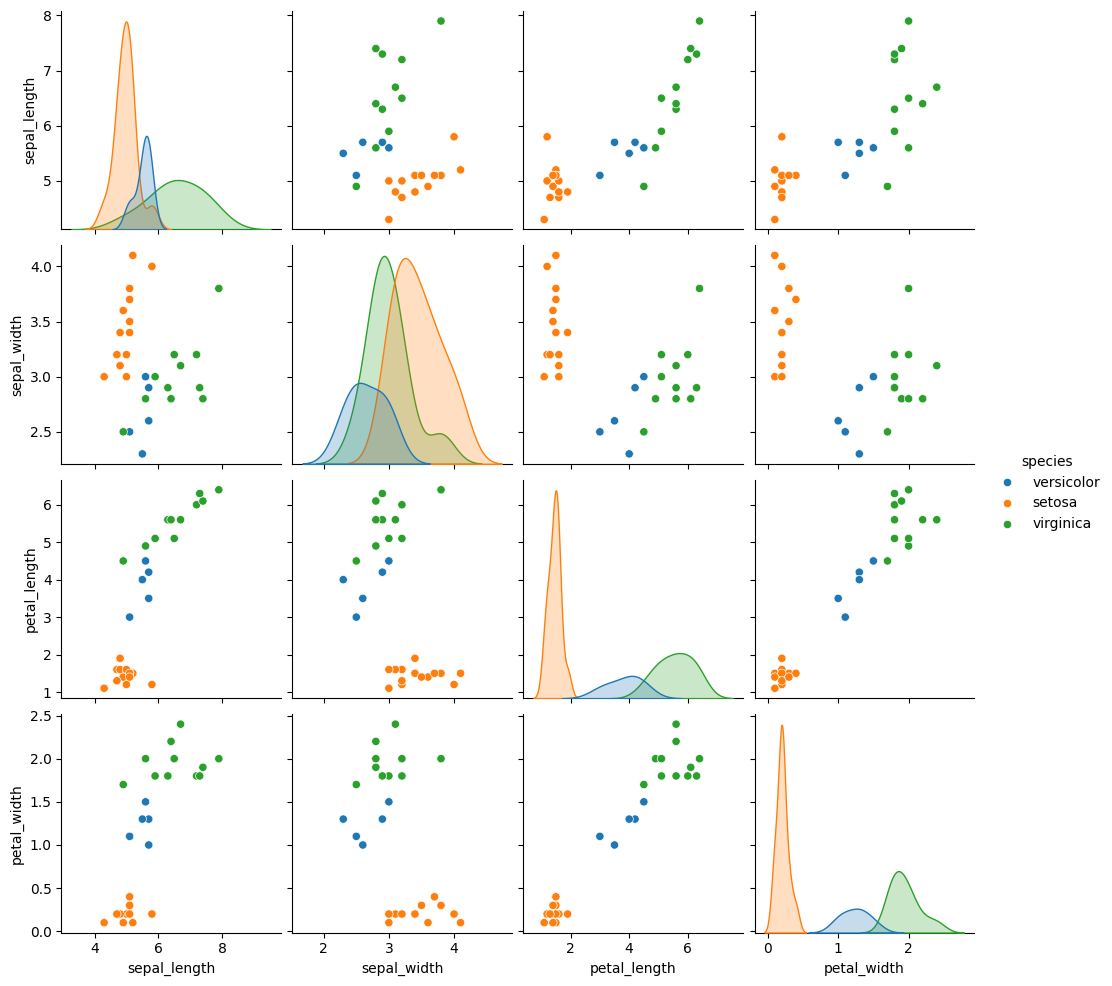

In [30]:
sns.pairplot(make_df(X_test, y_test), hue='species')
plt.show()

In [26]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [27]:
class KNN:

    def __init__(self, k=3) -> None:
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # sort by distance
        # argsort returns the indices that would sort an array in ascending order
        # so we get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # find k nearest neighbors labels
        k_nearest_labels = self.y_train[k_indices]
        # majority vote
        # bincount returns the number of occurrences of each value in the array
        # from 0 to the max(list), count of #of values at index same as that value
        # argmax returns the index of the maximum value which is the most common
        # neighbor label hence the prediction
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [33]:
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [34]:
X_test.shape, y_pred.shape

((30, 4), (30,))

/Users/sourabh/.pyenv/versions/3.10.5/envs/ai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


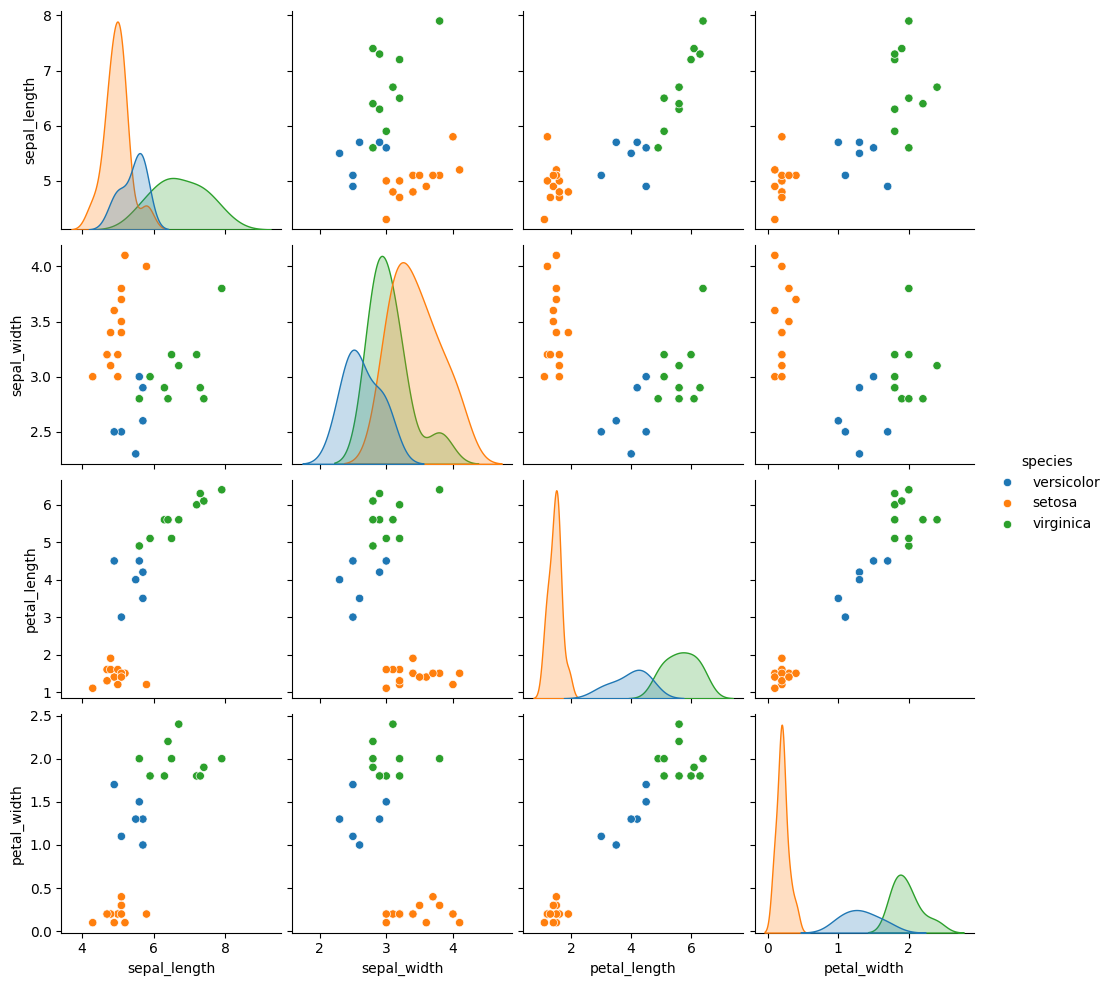

In [35]:
pred_df = make_df(X_test, y_pred)
sns.pairplot(pred_df, hue='species')
plt.show()

In [36]:
# loss

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print(accuracy(y_test, y_pred))

0.9666666666666667


In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_sk = KNeighborsClassifier(n_neighbors=3)
knn_sk.fit(X_train, y_train)
y_pred_sk = knn_sk.predict(X_test)

print(accuracy(y_test, y_pred_sk))

0.9666666666666667
